In [135]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

pd.set_option("max_columns", None)

# EDA

In [554]:
df = pd.read_csv("customer_rfm2.csv")

In [555]:
df.head()

,CustomerID,time_since_first_purchase,time_since_last_purchase,frequency,total_revenue,min_spent,max_spent,median_spent,mean_quantity,median_quantity,max_quantity,min_quantity,cancelled_mean,cancelled_num,unique_products,unique_products_perc,time_as_customer
0,12346.0,325.0,325.0,2.0,0.00,-77183.60,77183.6,0.00,0.000000,0.0,74215.0,-74215.0,0.5,1.0,1.0,0.500000,0.0
1,12347.0,367.0,2.0,182.0,4310.00,5.04,249.6,17.00,13.505495,12.0,240.0,2.0,0.0,0.0,103.0,0.565934,365.0
2,12348.0,358.0,75.0,31.0,1797.24,13.20,240.0,41.76,75.516129,72.0,144.0,1.0,0.0,0.0,22.0,0.709677,283.0
3,12349.0,18.0,18.0,73.0,1757.55,6.64,300.0,17.70,8.643836,6.0,36.0,1.0,0.0,0.0,73.0,1.000000,0.0
4,12350.0,310.0,310.0,17.0,334.40,8.50,40.0,19.80,11.588235,12.0,24.0,1.0,0.0,0.0,17.0,1.000000,0.0


In [556]:
# average order value (Revenue / number of orders)
df['AOV'] = df.total_revenue / df.frequency

In [557]:
df.head()

,CustomerID,time_since_first_purchase,time_since_last_purchase,frequency,total_revenue,min_spent,max_spent,median_spent,mean_quantity,median_quantity,max_quantity,min_quantity,cancelled_mean,cancelled_num,unique_products,unique_products_perc,time_as_customer,AOV
0,12346.0,325.0,325.0,2.0,0.00,-77183.60,77183.6,0.00,0.000000,0.0,74215.0,-74215.0,0.5,1.0,1.0,0.500000,0.0,0.000000
1,12347.0,367.0,2.0,182.0,4310.00,5.04,249.6,17.00,13.505495,12.0,240.0,2.0,0.0,0.0,103.0,0.565934,365.0,23.681319
2,12348.0,358.0,75.0,31.0,1797.24,13.20,240.0,41.76,75.516129,72.0,144.0,1.0,0.0,0.0,22.0,0.709677,283.0,57.975484
3,12349.0,18.0,18.0,73.0,1757.55,6.64,300.0,17.70,8.643836,6.0,36.0,1.0,0.0,0.0,73.0,1.000000,0.0,24.076027
4,12350.0,310.0,310.0,17.0,334.40,8.50,40.0,19.80,11.588235,12.0,24.0,1.0,0.0,0.0,17.0,1.000000,0.0,19.670588


In [558]:
len(df[df.time_as_customer == 0.0])

1381

In [559]:
df[df.time_as_customer > 0.0].time_as_customer.describe()

count    2991.000000
mean      195.465396
std       117.416855
min         1.000000
25%        89.000000
50%       203.000000
75%       301.000000
max       373.000000
Name: time_as_customer, dtype: float64

In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 18 columns):
CustomerID                   4372 non-null float64
time_since_first_purchase    4372 non-null float64
time_since_last_purchase     4372 non-null float64
frequency                    4372 non-null float64
total_revenue                4372 non-null float64
min_spent                    4372 non-null float64
max_spent                    4372 non-null float64
median_spent                 4372 non-null float64
mean_quantity                4372 non-null float64
median_quantity              4372 non-null float64
max_quantity                 4372 non-null float64
min_quantity                 4372 non-null float64
cancelled_mean               4372 non-null float64
cancelled_num                4372 non-null float64
unique_products              4372 non-null float64
unique_products_perc         4372 non-null float64
time_as_customer             4372 non-null float64
AOV                       

In [561]:
# recency: most recent purchase
# frequency: frequency of purchase 
# monetary: total revenue generated

## Visualizations

In [562]:
df.columns

Index(['CustomerID', 'time_since_first_purchase', 'time_since_last_purchase',
       'frequency', 'total_revenue', 'min_spent', 'max_spent', 'median_spent',
       'mean_quantity', 'median_quantity', 'max_quantity', 'min_quantity',
       'cancelled_mean', 'cancelled_num', 'unique_products',
       'unique_products_perc', 'time_as_customer', 'AOV'],
      dtype='object')

In [563]:
# features to use
features = ['time_since_last_purchase', 'frequency', 'AOV',
            'cancelled_mean', 'unique_products_perc']

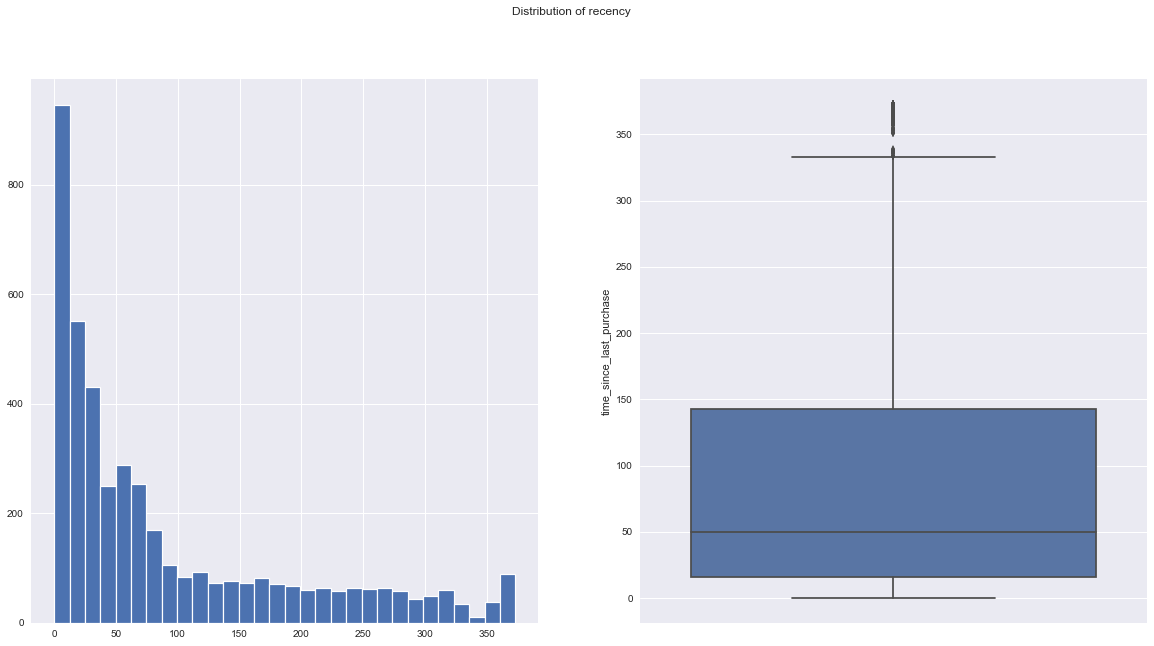

In [564]:
# visuailzations

# time_since_last_purchase
fig, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].hist(df.time_since_last_purchase,
        edgecolor = 'white',
        linewidth = 1.2,
        bins = 30)

sns.boxplot(df.time_since_last_purchase,
           ax = ax[1], orient = 'v')

fig.suptitle("Distribution of recency")
plt.show()

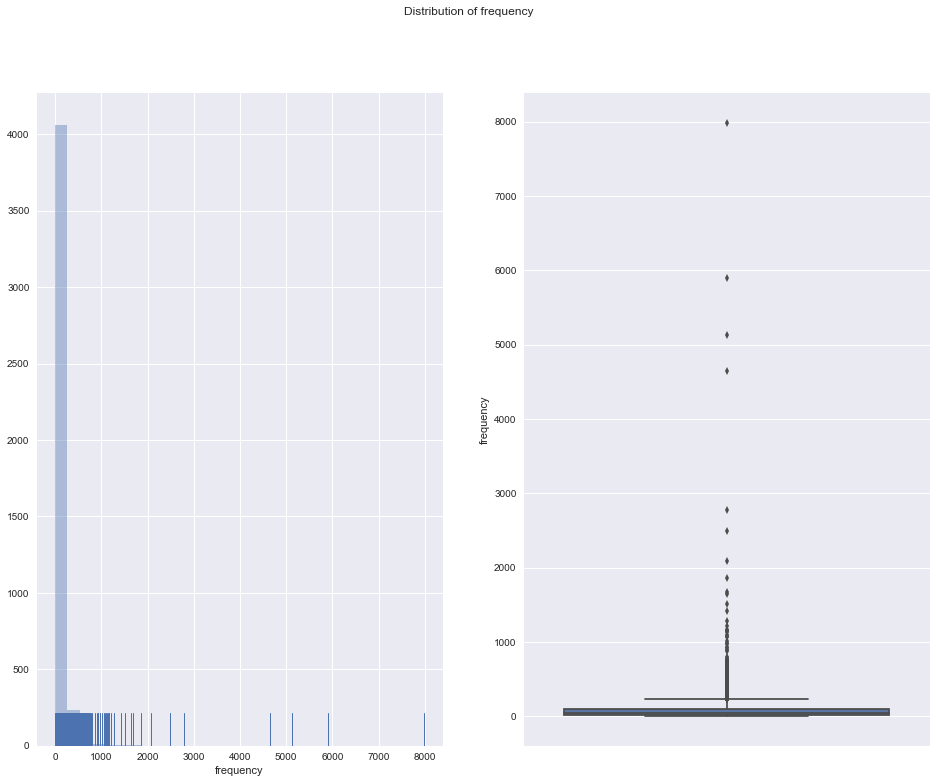

In [565]:
# frequency
fig, ax = plt.subplots(1,2, figsize = (16,12))
sns.distplot(df.frequency,
            bins = 30,
            kde = False,
            rug = True,
            ax = ax[0])

sns.boxplot(df.frequency,
           ax = ax[1],
           orient = 'v')

fig.suptitle("Distribution of frequency")
plt.show()

In [566]:
print(df.frequency.describe())


IQR = 102 - 17
max_whisk = 102 + (1.5 * IQR)
max_whisk

# remove frequency outliers
df_no = df[df.frequency < max_whisk]
df_no.info()

count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: frequency, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3992 entries, 0 to 4371
Data columns (total 18 columns):
CustomerID                   3992 non-null float64
time_since_first_purchase    3992 non-null float64
time_since_last_purchase     3992 non-null float64
frequency                    3992 non-null float64
total_revenue                3992 non-null float64
min_spent                    3992 non-null float64
max_spent                    3992 non-null float64
median_spent                 3992 non-null float64
mean_quantity                3992 non-null float64
median_quantity              3992 non-null float64
max_quantity                 3992 non-null float64
min_quantity                 3992 non-null float64
cancelled_mean               3992 non-null float64
cancelled_num                3

In [567]:
# outlier???
df[df.frequency > 1000]

# it seems that not noly do these customers generate huge
# revenue, they also sepnd a lot, (most)
# and they usually buy few number of products
# they are also mostly long time customers (which makes)
# sense, because of course you need time to
# spend all that money

,CustomerID,time_since_first_purchase,time_since_last_purchase,frequency,total_revenue,min_spent,max_spent,median_spent,mean_quantity,median_quantity,max_quantity,min_quantity,cancelled_mean,cancelled_num,unique_products,unique_products_perc,time_as_customer,AOV
330,12748.0,373.0,0.0,4642.0,29072.10,-1829.84,850.50,3.30,5.215424,1.0,576.0,-244.0,0.009910,46.0,1769.0,0.381086,373.0,6.262839
564,13081.0,371.0,1.0,1061.0,27964.48,-158.40,207.50,17.70,17.927427,12.0,288.0,-32.0,0.031103,33.0,511.0,0.481621,370.0,26.356720
568,13089.0,369.0,2.0,1857.0,57385.88,-419.40,788.40,19.80,16.578891,12.0,288.0,-36.0,0.021002,39.0,636.0,0.342488,367.0,30.902466
698,13263.0,325.0,1.0,1677.0,7454.07,0.19,122.40,3.30,2.850328,2.0,60.0,1.0,0.000000,0.0,450.0,0.268336,324.0,4.444884
1273,14056.0,284.0,1.0,1128.0,8124.40,-12.45,74.25,4.95,3.751773,2.0,30.0,-6.0,0.019504,22.0,321.0,0.284574,283.0,7.202482
1300,14096.0,101.0,4.0,5128.0,57120.91,-1100.44,1599.26,5.79,3.185452,2.0,108.0,-1.0,0.003315,17.0,1121.0,0.218604,97.0,11.139023
1345,14156.0,372.0,9.0,1420.0,113384.14,-1224.00,2365.20,20.80,40.158451,12.0,1440.0,-192.0,0.014085,20.0,716.0,0.504225,363.0,79.847986
1348,14159.0,362.0,19.0,1212.0,4678.30,-4.25,51.00,2.95,3.626238,2.0,48.0,-4.0,0.006601,8.0,501.0,0.413366,343.0,3.859983
1447,14298.0,360.0,3.0,1640.0,50862.44,-637.50,650.25,23.04,35.378659,24.0,900.0,-250.0,0.001829,3.0,884.0,0.539024,357.0,31.013683
1615,14527.0,373.0,2.0,1011.0,7711.38,-80.00,87.60,6.76,2.026706,1.0,36.0,-2.0,0.038576,39.0,331.0,0.327399,371.0,7.627478


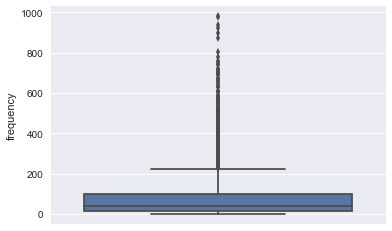

In [568]:
sns.boxplot(df[df.frequency < 1000].frequency,
           orient = 'v')

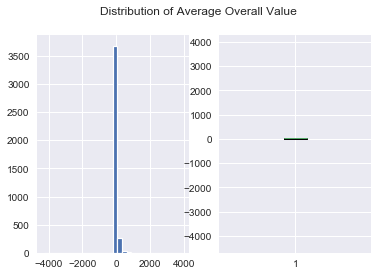

In [569]:
# AOV
fig, ax = plt.subplots(1,2)
ax[0].hist(df_no.AOV,
        edgecolor = 'white',
        linewidth = 1.2,
        bins = 30)

ax[1].boxplot(df_no.AOV)

fig.suptitle("Distribution of Average Overall Value")
plt.show()

In [570]:
df_no.AOV.describe()

count    3992.000000
mean       29.611924
std       132.468291
min     -4287.630000
25%        12.212965
50%        17.164179
75%        23.920100
max      3861.000000
Name: AOV, dtype: float64

In [571]:
IQR = 23.920100 - 12.212965
min_whisk = (12.212965) - (1.5 * IQR)
max_whisk = (23.920100) + (1.5 * IQR)
print(min_whisk, max_whisk)

df_no[(df_no.AOV < -200) | (df_no.AOV > 200)]
df_no = df_no[(df_no.AOV > -200) & (df_no.AOV < 200)]

-5.347737500000001 41.4808025


In [572]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 4371
Data columns (total 18 columns):
CustomerID                   3913 non-null float64
time_since_first_purchase    3913 non-null float64
time_since_last_purchase     3913 non-null float64
frequency                    3913 non-null float64
total_revenue                3913 non-null float64
min_spent                    3913 non-null float64
max_spent                    3913 non-null float64
median_spent                 3913 non-null float64
mean_quantity                3913 non-null float64
median_quantity              3913 non-null float64
max_quantity                 3913 non-null float64
min_quantity                 3913 non-null float64
cancelled_mean               3913 non-null float64
cancelled_num                3913 non-null float64
unique_products              3913 non-null float64
unique_products_perc         3913 non-null float64
time_as_customer             3913 non-null float64
AOV                       

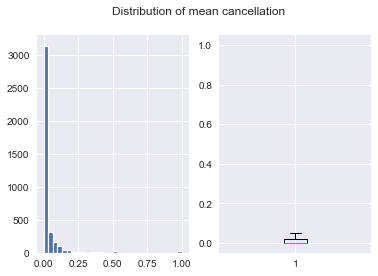

In [573]:
# cancelled mean
fig, ax = plt.subplots(1,2)
ax[0].hist(df_no.cancelled_mean,
        edgecolor = 'white',
        linewidth = 1.2,
        bins = 30)

ax[1].boxplot(df_no.cancelled_mean)

fig.suptitle("Distribution of mean cancellation")
plt.show()

In [574]:
len(df_no[df_no.cancelled_mean >= 0.5])

54

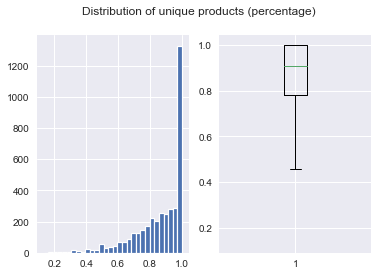

In [575]:
# unique products percentage
fig, ax = plt.subplots(1,2)
ax[0].hist(df_no.unique_products_perc,
        edgecolor = 'white',
        linewidth = 1.2,
        bins = 30)

ax[1].boxplot(df_no.unique_products_perc)

fig.suptitle("Distribution of unique products (percentage)")
plt.show()

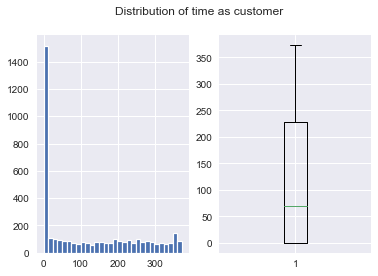

count    4372.000000
mean      133.723010
std       133.000474
min         0.000000
25%         0.000000
50%        98.000000
75%       256.000000
max       373.000000
Name: time_as_customer, dtype: float64


In [576]:
# time as customer
fig, ax = plt.subplots(1,2)
ax[0].hist(df_no.time_as_customer,
        edgecolor = 'white',
        linewidth = 1.2,
        bins = 30)

ax[1].boxplot(df_no.time_as_customer)

fig.suptitle("Distribution of time as customer")
plt.show()

print(df.time_as_customer.describe())

In [577]:
df_no[df_no.unique_products_perc < 0]

,CustomerID,time_since_first_purchase,time_since_last_purchase,frequency,total_revenue,min_spent,max_spent,median_spent,mean_quantity,median_quantity,max_quantity,min_quantity,cancelled_mean,cancelled_num,unique_products,unique_products_perc,time_as_customer,AOV


In [578]:
features

['time_since_last_purchase',
 'frequency',
 'AOV',
 'cancelled_mean',
 'unique_products_perc']

# Model fitting

### Preprocessing (scaling)

In [579]:
# k means preprocessing requires standardization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_features = df_no.copy()
df_features = df_features[features]

In [580]:
df_features.describe()

,time_since_last_purchase,frequency,AOV,cancelled_mean,unique_products_perc
count,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000
mean,98.025045,55.773831,22.324432,0.031412,0.859797
std,102.137305,52.430626,24.400657,0.105574,0.158354
min,0.000000,1.000000,-152.640000,0.000000,0.133333
25%,19.000000,16.000000,11.968696,0.000000,0.780952
50%,56.000000,36.000000,17.000000,0.000000,0.906977
75%,156.000000,81.000000,23.183333,0.019355,1.000000
max,373.000000,229.000000,197.341775,1.000000,1.000000


In [581]:
for i in features:
    df_features[i] = scaler.fit_transform(df_features[[i]])

In [582]:
df_features.head()

,time_since_last_purchase,frequency,AOV,cancelled_mean,unique_products_perc
0,0.871314,0.004386,0.436137,0.5,0.423077
1,0.005362,0.793860,0.503801,0.0,0.499155
2,0.201072,0.131579,0.601790,0.0,0.665012
3,0.048257,0.315789,0.504929,0.0,1.000000
4,0.831099,0.070175,0.492342,0.0,1.000000


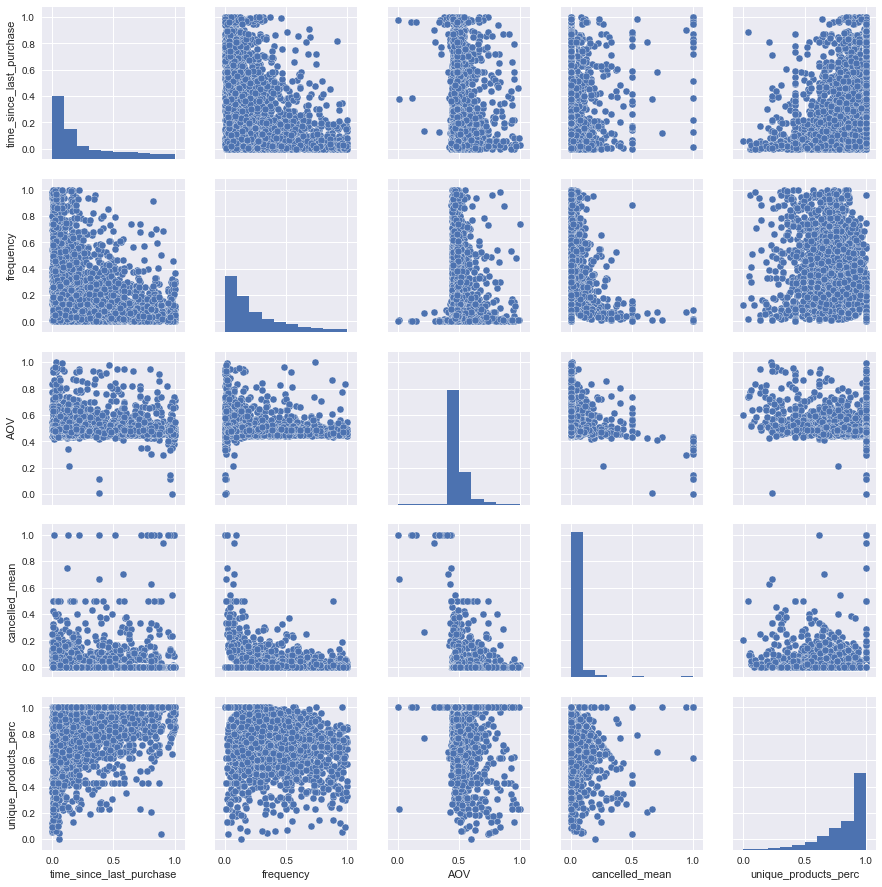

In [368]:
sns.pairplot(df_features)

## k-means

In [369]:
# use k-means to find clusters
# use elbow method + silhouette score to find the best k-values

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [370]:
sil_scores = []
for i in range(3,10,2):
    km = KMeans(n_clusters = i)
    km.fit(df_features)
    cluster_id = km.predict(df_features)
    sil_scores.append(silhouette_score(df_features,
                                      cluster_id))

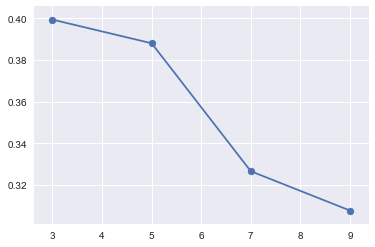

In [371]:
# plot silhouette scores for each k
plt.plot(range(3,10,2), sil_scores)
plt.scatter(range(3,10,2), sil_scores)

In [372]:
# use best k score to create real clusters
km = KMeans(n_clusters = 3)
km.fit(df_features)
cluster_id = km.predict(df_features)
df_features['kmeans_cluster'] = cluster_id

In [373]:
df_features.kmeans_cluster.value_counts()

2    2016
0     980
1     917
Name: kmeans_cluster, dtype: int64

In [374]:
np.unique(km.labels_)

array([0, 1, 2], dtype=int32)

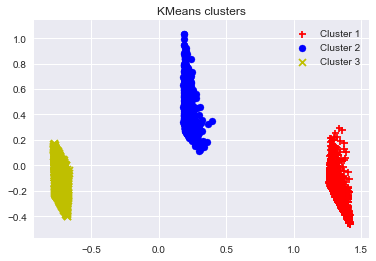

In [375]:
# visualizing clusters

# decomposition process using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2).fit(df_features)
pca_2d = pca.transform(df_features)
for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c= 'r',
                       marker = '+')
    elif km.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b',
                       marker = 'o')
    elif km.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'y',
                       marker = 'x')
        
plt.legend([c1,c2,c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title("KMeans clusters")
plt.show()

In [246]:
# kmeans doesn't work too well due to outliers and high collinearity
# among predictor variables
# may need to first perform PCA to get better insights

### Hierarchical clustering

In [376]:
# import hierarchy libarry from scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [377]:
# source: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [583]:
X = df_features

In [379]:
# generate linkage matrix
# with method 'ward'
# other methods 
Z = linkage(X, 'ward')

In [380]:
# import methods to calculate metrics
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [381]:
# calculate distance
c, coph_dists = cophenet(Z, pdist(X))

c

0.93692631521618008

In [382]:
Z.shape
# array with [index1, index2, dist, sample_count]

(3912, 4)

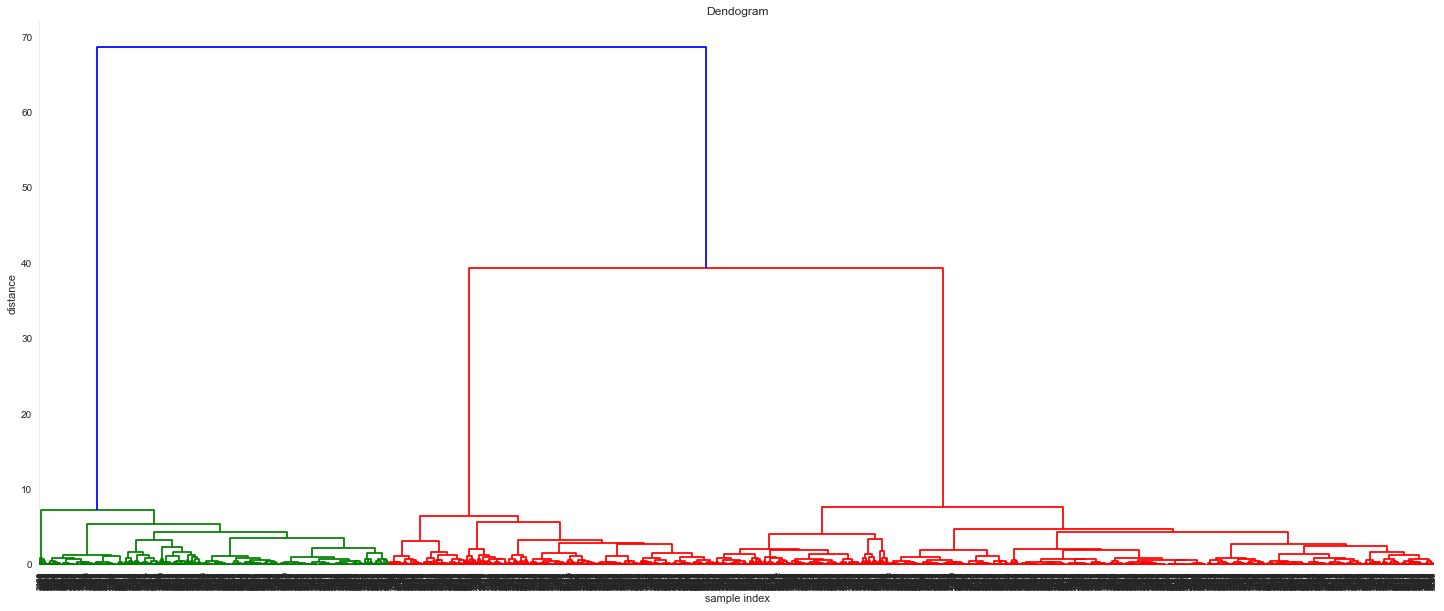

In [383]:
# dendogram
# calculate full dendogram
plt.figure(figsize = (25,10))
plt.title("Dendogram")
plt.xlabel("sample index")
plt.ylabel("distance")

dendrogram(
    Z,
    leaf_rotation = 90., # rotates x axis labels
    leaf_font_size = 8. # font size for the x axis labels
)

plt.show()

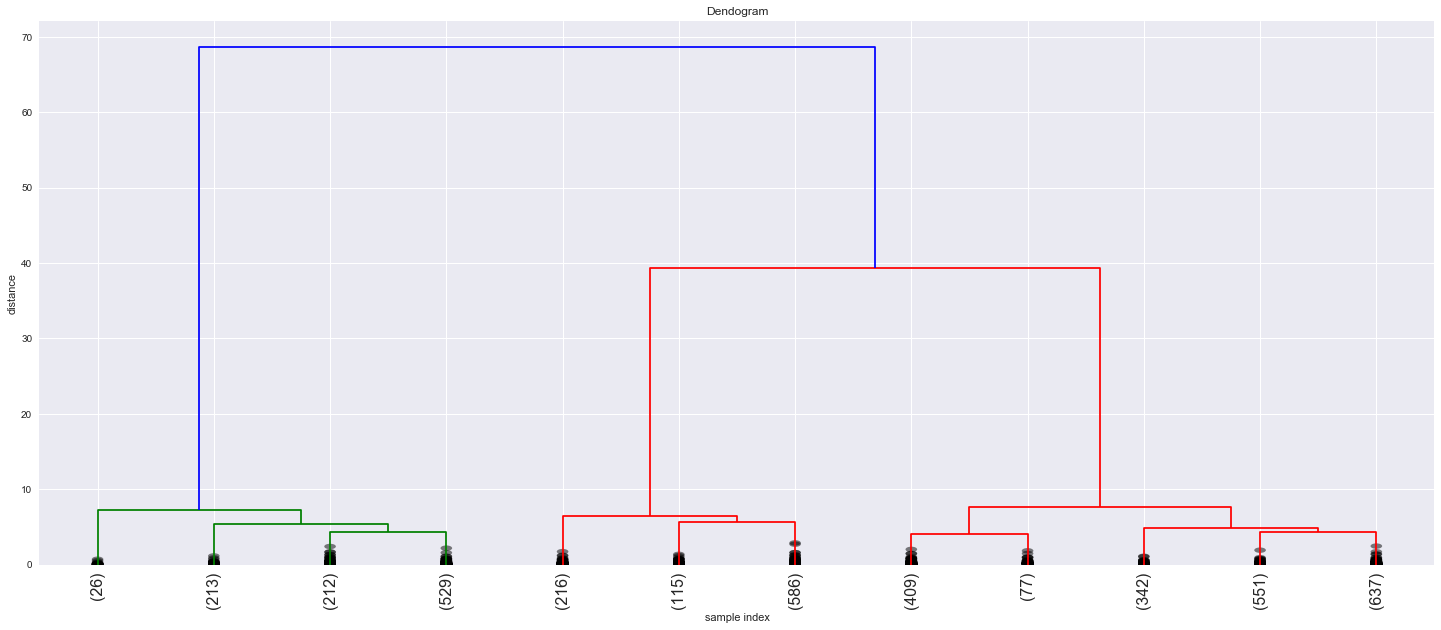

In [384]:
# dendogram
# calculate full dendogram
plt.figure(figsize = (25,10))
plt.title("Dendogram")
plt.xlabel("sample index")
plt.ylabel("distance")

dendrogram(
    Z,
    truncate_mode = 'lastp', # show only the last p merged clusters
    p = 12, # show only the last p merged clusters
    leaf_rotation = 90., # rotates x axis labels
    leaf_font_size = 16., # font size for the x axis labels
    show_contracted = True # to get distribution impression in truncated branches
)

plt.show()

### DBSCAN (density based spatial clustering of Applications with Noise)

In [385]:
# source: http://www.dummies.com/programming/big-data/data-science/how-to-create-an-unsupervised-learning-model-with-dbscan/

In [584]:
# import dbscan
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

In [585]:
dbscan

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [586]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [587]:
np.unique(dbscan.labels_) # 4 clusters

array([0])

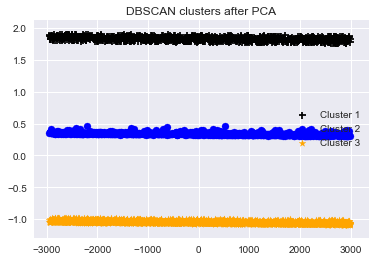

In [548]:
# visualizing clusters

# decomposition process using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2).fit(X)
pca_2d = pca.transform(X)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c= 'black',
                       marker = '+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'blue',
                       marker = 'o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'orange',
                       marker = '*')
    
        
plt.legend([c1,c2,c3], 
           ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title("DBSCAN clusters after PCA")
plt.show()

In [392]:
df_features['dbscan_labels'] = dbscan.labels_

In [393]:
df_features.head()

,time_since_last_purchase,frequency,AOV,cancelled_mean,unique_products_perc,kmeans_cluster,dbscan_labels
0,0.871314,0.004386,0.436137,0.5,0.423077,0,0
1,0.005362,0.793860,0.503801,0.0,0.499155,1,1
2,0.201072,0.131579,0.601790,0.0,0.665012,2,2
3,0.048257,0.315789,0.504929,0.0,1.000000,2,2
4,0.831099,0.070175,0.492342,0.0,1.000000,0,0


In [268]:
# drop the noise and cluster again
df_features_no_noise = df_features[df_features.dbscan_labels != -1]

In [269]:
df_features_no_noise = df_features_no_noise.drop(['dbscan_labels','kmeans_cluster'], 
                          axis = 1)

In [270]:
df_features_no_noise.head()

,time_since_last_purchase,frequency,AOV,cancelled_mean,unique_products_perc,time_as_customer
1,-0.889050,0.382657,-0.040513,-0.299508,-1.492213,1.739117
2,-0.164560,-0.266959,0.228864,-0.299508,-0.692189,1.122508
3,-0.730258,-0.086271,-0.037413,-0.299508,0.923643,-1.005548
4,2.167700,-0.327188,-0.072017,-0.299508,0.923643,-1.005548
5,-0.551616,0.008375,-0.098748,0.684345,-1.185443,0.949556


In [271]:
# dbscan without noise
dbscan = DBSCAN()
dbscan.fit(df_features_no_noise)
np.unique(dbscan.labels_)

array([0, 1, 2, 3, 4, 5, 6])

IndexError: index 3974 is out of bounds for axis 0 with size 3974

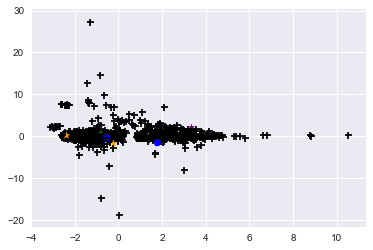

In [273]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2).fit(X)
pca_2d = pca.transform(X)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c= 'black',
                       marker = '+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'blue',
                       marker = 'o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'orange',
                       marker = '*')
    elif dbscan.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'green',
                       marker = '*')
    elif dbscan.labels_[i] == 4:
        c5 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'purple',
                       marker = '*')
    elif dbscan.labels_[i] == 5:
        c6 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'brown',
                       marker = '*')
    elif dbscan.labels_[i] == 6:
        c7 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'pink',
                       marker = '*')
    
        
plt.legend([c1,c2,c3,c4,c5,c6,c7], 
           ['Cluster 1', 'Cluster 2', 'Cluster 3',
            'cluster 4', 'cluster 5', 'cluster 6',
           'clsuter 7'])
plt.title("DBSCAN clusters without noise")
plt.show()

In [396]:
df_features['customer_id'] = df_no['CustomerID']

In [401]:
df_features.head()

,time_since_last_purchase,frequency,AOV,cancelled_mean,unique_products_perc,kmeans_cluster,dbscan_labels,customer_id
0,0.871314,0.004386,0.436137,0.5,0.423077,0,0,12346.0
1,0.005362,0.793860,0.503801,0.0,0.499155,1,1,12347.0
2,0.201072,0.131579,0.601790,0.0,0.665012,2,2,12348.0
3,0.048257,0.315789,0.504929,0.0,1.000000,2,2,12349.0
4,0.831099,0.070175,0.492342,0.0,1.000000,0,0,12350.0


In [512]:
df_full = df[['time_since_last_purchase','frequency','AOV', 'cancelled_mean', 'unique_products_perc','CustomerID']]

In [513]:
cluster_id = df_no.CustomerID.tolist()
len(cluster_id)

3913

In [514]:
full_id = df_full.CustomerID.tolist()
len(full_id)

4372

In [515]:
cluster_id[0] in full_id

True

In [516]:
outliers_id = []
for i in full_id:
    if i not in cluster_id:
        outliers_id.append(i)

In [517]:
len(outliers_id)

459

In [518]:
outlier_list_2 = ['outlier' if i in outliers_id else np.nan for i in full_id]

In [519]:
outlier_list_2

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'outlier',
 nan,
 nan,
 'outlier',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'outlier',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'outlier',
 nan,
 nan,
 'outlier',
 nan,
 'outlier',
 nan,
 'outlier',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'outlier',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'outlier',
 'outlier',
 nan,
 'outlier',
 nan,
 'outlier',
 'outlier',
 nan,
 nan,
 nan,
 nan,
 nan,
 'outlier',
 nan,
 nan,
 'outlier',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'outlier',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'outlier',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [520]:
df_full['kmeans_cluster'] = outlier_list_2
df_full['dbscan_labels'] = outlier_list_2

/Users/jk6653284/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jk6653284/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [527]:
df_outliers = df_full.dropna(subset = ['kmeans_cluster'])

In [528]:
df_full.head()

,time_since_last_purchase,frequency,AOV,cancelled_mean,unique_products_perc,CustomerID,kmeans_cluster,dbscan_labels
12,7.0,254.0,24.588701,0.023622,0.842520,12359.0,outlier,outlier
15,3.0,274.0,18.812336,0.029197,0.733577,12362.0,outlier,outlier
55,24.0,778.0,159.030141,0.079692,0.570694,12415.0,outlier,outlier
66,25.0,300.0,26.257333,0.020000,0.860000,12428.0,outlier,outlier
69,35.0,240.0,26.734958,0.016667,0.679167,12431.0,outlier,outlier


In [529]:
df_no['kmeans_cluster'] = dbscan.labels_
df_no['dbscan_labels'] = km.labels_

In [530]:
full_df = pd.concat([df_no,df_outliers])

In [533]:
full_df.head()

,AOV,CustomerID,cancelled_mean,cancelled_num,dbscan_labels,frequency,kmeans_cluster,max_quantity,max_spent,mean_quantity,median_quantity,median_spent,min_quantity,min_spent,time_as_customer,time_since_first_purchase,time_since_last_purchase,total_revenue,unique_products,unique_products_perc
0,0.000000,12346.0,0.5,1.0,0,2.0,0,74215.0,77183.6,0.000000,0.0,0.00,-74215.0,-77183.60,0.0,325.0,325.0,0.00,1.0,0.500000
1,23.681319,12347.0,0.0,0.0,1,182.0,1,240.0,249.6,13.505495,12.0,17.00,2.0,5.04,365.0,367.0,2.0,4310.00,103.0,0.565934
2,57.975484,12348.0,0.0,0.0,2,31.0,2,144.0,240.0,75.516129,72.0,41.76,1.0,13.20,283.0,358.0,75.0,1797.24,22.0,0.709677
3,24.076027,12349.0,0.0,0.0,2,73.0,2,36.0,300.0,8.643836,6.0,17.70,1.0,6.64,0.0,18.0,18.0,1757.55,73.0,1.000000
4,19.670588,12350.0,0.0,0.0,0,17.0,0,24.0,40.0,11.588235,12.0,19.80,1.0,8.50,0.0,310.0,310.0,334.40,17.0,1.000000


In [491]:
full_df.to_csv("full_customer_segmentation.csv")

In [534]:
df_features.head()

,time_since_last_purchase,frequency,AOV,cancelled_mean,unique_products_perc,kmeans_cluster,dbscan_labels,customer_id
0,0.871314,0.004386,0.436137,0.5,0.423077,0,0,12346.0
1,0.005362,0.793860,0.503801,0.0,0.499155,1,1,12347.0
2,0.201072,0.131579,0.601790,0.0,0.665012,2,2,12348.0
3,0.048257,0.315789,0.504929,0.0,1.000000,2,2,12349.0
4,0.831099,0.070175,0.492342,0.0,1.000000,0,0,12350.0


In [537]:
df_outliers_scaled = df_outliers.copy()

In [538]:
for i in features:
    df_outliers_scaled[i] = scaler.fit_transform(df_outliers_scaled[[i]])

In [543]:
df_outliers_scaled = df_outliers_scaled.rename(columns = {'CustomerID': 'customer_id'})

In [544]:
full_df_scaled = pd.concat([df_features, df_outliers_scaled])

In [545]:
print(len(full_df), len(full_df_scaled))

4372 4372


In [546]:
full_df_scaled.head()

,AOV,cancelled_mean,customer_id,dbscan_labels,frequency,kmeans_cluster,time_since_last_purchase,unique_products_perc
0,0.436137,0.5,12346.0,0,0.004386,0,0.871314,0.423077
1,0.503801,0.0,12347.0,1,0.793860,1,0.005362,0.499155
2,0.601790,0.0,12348.0,2,0.131579,2,0.201072,0.665012
3,0.504929,0.0,12349.0,2,0.315789,2,0.048257,1.000000
4,0.492342,0.0,12350.0,0,0.070175,0,0.831099,1.000000


In [547]:
full_df_scaled.to_csv("full_customer_segmentation_scaled.csv")